* For more detailed explanations, you can check the following link: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners.
* In this link, Artificial Neural Network (ANN) is explained in very detail and a 2-Layer ANN model is coded explicitly.
* In my kernel, I implemented a 3-layer ANN model explicitly.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # for vizualization
from matplotlib.pyplot import figure # for figuresize

## Import data

In [2]:
url ='https://raw.githubusercontent.com/RafaelCastro32/RNA/main/dadosmamografia.csv'
voice_data = pd.read_csv(url)

## Preview data

In [3]:
voice_data.head()

,Avaliação BI-RADS,idade,forma,margem,densidade,label
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [62]:
print(len(voice_data))
print(len(voice_data.columns))

834
6


Extrair informações de gênero (Y_data) e recurso (X_data)

In [34]:
Y_data = voice_data.label.values
X_data = voice_data.drop(["label"], axis = 1)
X_data = (X_data - X_data.min())/(X_data.max() - X_data.min()) # normalization

In [63]:
print(voice_data.shape)
print(X_data.shape)
print(Y_data.shape)

(834, 6)
(834, 5)
(834,)


## Vizualization of voice_data, X_data and Y_data
<a href="https://ibb.co/ePbiaA"><img src="https://preview.ibb.co/gwBGvA/im1.png" alt="im1" border="0"></a>

Dividir dados para fins de treinamento e teste

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [41]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [82]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print('***'*10)
x_train.info()

(5, 583)
(1, 583)
(5, 251)
(1, 251)
******************************
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Avaliação BI-RADS to densidade
Columns: 583 entries, 234 to 102
dtypes: float64(583)
memory usage: 23.0+ KB


## 3-Layer Artificial Neural Network (ANN) Construction
<a href="https://ibb.co/dGQUyV"><img src="https://preview.ibb.co/eRs9yV/im2.png" alt="im2" border="0"></a>

Crie peso e viés para rede neural de 3 camadas (2 camadas ocultas)

In [43]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"W1": np.random.randn(2,x_train.shape[0]) * 0.1,
                  "b1": np.zeros((2,1)),
                  "W2": np.random.randn(2,2) * 0.1,
                  "b2": np.zeros((2,1)),
                  "W3": np.random.randn(1,2) * 0.1,
                  "b3": np.zeros((1,1))}
    
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

In [93]:
print(parameters["W1"].shape)
print(parameters["W2"].shape)
print(parameters["W3"].shape)
print(parameters)

(2, 5)
(2, 2)
(1, 2)
{'W1': array([[ 0.09836513,  0.01063276, -0.06572223, -0.14277058, -0.05708503],
       [-0.0841129 ,  0.10908082,  0.17938322, -0.18399776,  0.10782966]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 0.14663766, -0.05597481],
       [ 0.03508035,  0.03854485]]), 'b2': array([[0.],
       [0.]]), 'W3': array([[-0.05894229, -0.13236169]]), 'b3': array([[0.]])}


In [11]:
print(parameters["b1"].shape)
print(parameters["b2"].shape)
print(parameters["b3"].shape)

(2, 1)
(2, 1)
(1, 1)


## Sigmoid function :  sigmoid(x) = 1 / ( 1 + exp(-x) )

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## Forward Propagation

In [97]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["W1"],x_train) + parameters["b1"]
    A1 = sigmoid(Z1) # tanh is used as activation function 1
    Z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
    A2 = sigmoid(Z2) # tanh is used as activation function 2
    Z3 = np.dot(parameters["W3"],A2) + parameters["b3"]
    A3 = sigmoid(Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "W1": parameters["W1"],
             "Z2": Z2,
             "A2": A2,
             "W2": parameters["W2"],
             "Z3": Z3,
             "A3": A3,
             "W3": parameters["W3"]}
    
    return A3, cache

A3, cache = forward_propagation_NN(x_train, parameters)

In [ ]:
cache


## Função de perda e função de custo
* As funções de perda e custo são as mesmas da regressão logística
* Função de entropia cruzada
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

Custo de computação

In [123]:
def compute_cost_NN(A3, Y, parameters):
    
    logprobs = np.multiply(np.log(A3),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return cost

cost = compute_cost_NN(A3, y_train, parameters)

In [128]:
cost

0.3759930903007114

O Black Propagation visa minimizar a função de custo ajustando os pesos e vieses da rede.O nível de ajuste é determinado pelos gradientes da função de custo em relação a esses parâmetros. https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd

O derivado de uma função de custo mede a sensibilidade à alteração do valor da função (valor de saída) em relação a uma alteração em seu argumento x (valor de entrada). Em outras palavras, a derivada nos diz a direção C está indo.
O gradiente mostra o quanto o parâmetro x precisa mudar (na direção positiva ou negativa) para minimizar C.
Calcular esses gradientes acontece usando uma técnica chamada regra de cadeia.

## Backward Propagation with Gradient Decent

In [125]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dimension = X.shape[0] # é 5 caracteristicas para o nosso caso
    dZ3 = cache["A3"] - Y # d(cost)/d(Z3)
    dW3 = 1/dimension * np.dot(dZ3,cache["A2"].T) # d(cost)/d(W3)
    db3 = 1/dimension * np.sum(dZ3, axis=1, keepdims=True) # d(cost)/d(b3) e axis=0(col) e 1(lin)
    dZ2 = np.multiply(np.dot(dZ3.T, cache["W3"]).T , 1-np.power(cache["A2"],2)) # d(cost)/d(Z2)
    dW2 = 1/dimension * np.dot(cache["A1"], dZ2.T) # d(cost)/d(W2)
    db2 = 1/dimension * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/d(b2)
    dZ1 = np.multiply(np.dot(dZ2.T, cache["W2"].T).T,1-np.power(cache["A1"],2)) # d(cost)/d(Z1)
    dW1 = 1/dimension * np.dot(dZ1, X.T) # d(cost)/d(W1)
    db1 = 1/dimension * np.sum(dZ1,axis=1, keepdims=True) # d(cost)/d(b1)
    grads = {'dW3':dW3, 
             'db3':db3,
             'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

grads = backward_propagation_NN(parameters, cache, x_train, y_train)

In [144]:
#print(grads)
#print(grads["dW3"].shape)
print(grads["dW1"])
print(grads["dW1"].shape)


[[0.00455085 0.00492787 0.01151612 0.01062051 0.00224464]
 [0.02244537 0.02555196 0.06198081 0.05779202 0.00980461]]
(2, 5)


##  Defina a taxa de aprendizado
A quantidade que os pesos são atualizados durante o treinamento é referida como o tamanho da etapa ou a "taxa de aprendizagem".

A taxa de aprendizagem controla a rapidez com que o modelo é adaptado ao problema. Taxas de aprendizagem menores exigem mais épocas de treinamento, dadas as pequenas mudanças feitas nos pesos a cada atualização, enquanto taxas de aprendizagem maiores resultam em mudanças rápidas e requerem menos épocas de treinamento.

In [16]:
Learning_Rate = 0.001

## Update weight and bias

In [17]:
def update_parameters_NN(parameters, grads, learning_rate = Learning_Rate):
    parameters = {"W1": parameters["W1"]-learning_rate*grads["dW1"],
                  "b1": parameters["b1"]-learning_rate*grads["db1"],
                  "W2": parameters["W2"]-learning_rate*grads["dW2"],
                  "b2": parameters["b2"]-learning_rate*grads["db2"],
                  "W3": parameters["W3"]-learning_rate*grads["dW3"],
                  "b3": parameters["b3"]-learning_rate*grads["db3"]}
    
    return parameters

parameters = update_parameters_NN(parameters, grads, learning_rate = Learning_Rate)

In [145]:
parameters

{'W1': array([[ 0.09836513,  0.01063276, -0.06572223, -0.14277058, -0.05708503],
        [-0.0841129 ,  0.10908082,  0.17938322, -0.18399776,  0.10782966]]),
 'W2': array([[ 0.14663766, -0.05597481],
        [ 0.03508035,  0.03854485]]),
 'W3': array([[-0.05894229, -0.13236169]]),
 'b1': array([[0.],
        [0.]]),
 'b2': array([[0.],
        [0.]]),
 'b3': array([[0.]])}

## Preveja os dados de teste com peso e viés atualizados (com parâmetros atualizados)

In [18]:
def predict_NN(parameters,x_test):
    # x_test é a entrada para propagação direta
    A3, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A3.shape[1]):
        if A3[0,i]<= 0.5: # if smaller than 0.5, predict it as 0
            Y_prediction[0,i] = 0
        else: # if greater than 0.5, predict it as 1
            Y_prediction[0,i] = 1

    return Y_prediction

Y_prediction = predict_NN(parameters,x_test)

In [146]:
Y_prediction

array([[1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 

Criar modelo de rede neural de 3 camadas

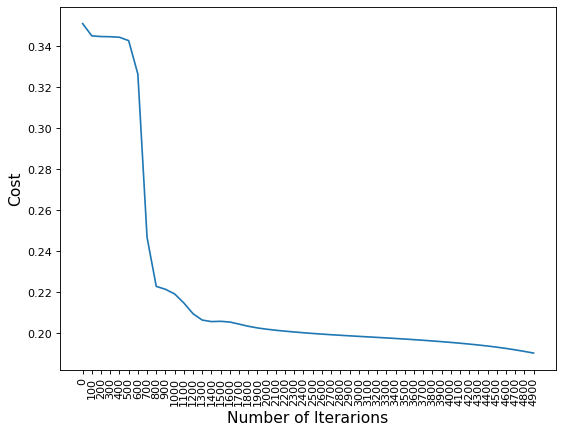

train accuracy: %83.533
test accuracy: %85.657


In [19]:
def three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parâmetros e tamanhos de camada
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A3, cache = forward_propagation_NN(x_train,parameters)
        # calcular custo
        cost = compute_cost_NN(A3, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0: # para visualizar dados em cada 100 iterações
            cost_list.append(cost)
            index_list.append(i)

    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarions", fontsize = 14)
    plt.ylabel("Cost", fontsize = 14)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Accuracies
    print("train accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,3)))
    print("test accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,3)))
    return parameters

parameters = three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=5000)